## Machine Learning Model Building Pipeline: Machine Learning Model Build

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline that we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 4: Building the Final Machine Learning Model**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Machine Learning Model build

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 


### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [5]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous lecture (feature engineering lecture).
# If you haven't done so, go ahead and check the previous lecture / notebook to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,0.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [6]:
# capture the target
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [7]:
# load selected features
# we selected the features in the previous lecture / notebook
# if you haven't done so, go ahead and visit the previous lecture to find out how to select
# the features

features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course. 

features = features + ['LotFrontage'] 

features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [9]:
# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression

Remember to set the seed.

In [66]:
# train the model
lin_model = Lasso(alpha=0.0005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
# evaluate the model:
# remember that we log transformed the output (SalePrice) in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = lin_model.predict(X_train)
print('linear train mse: {:.2f}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))/1e9))
print('linear train rmse: {:.2f}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))/1e5))
print()
pred = lin_model.predict(X_test)
print('linear test mse: {:.2f}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))/1e9))
print('linear test rmse: {:.2f}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))/1e5))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1.09
linear train rmse: 0.33

linear test mse: 1.41
linear test rmse: 0.37

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

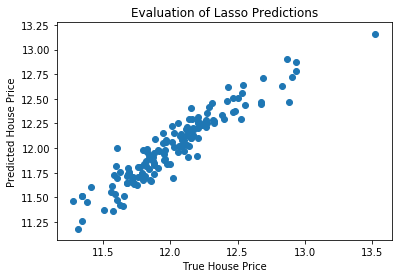

In [58]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')


(0, 20)

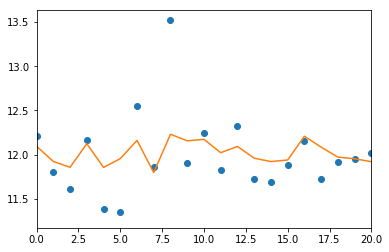

In [51]:
lin_model = Lasso(alpha=0.05, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)
plt.plot(y_test, 'o')
plt.plot(lin_model.predict(X_test))
plt.xlim(0,20)


(0, 20)

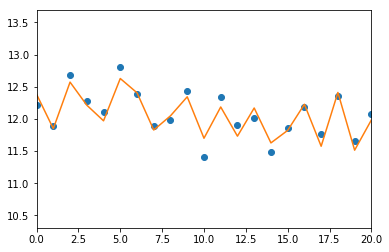

In [52]:
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)
plt.plot(y_train, 'o')
plt.plot(lin_model.predict(X_train))
plt.xlim(0,20)


We can see that our model is doing a pretty good job at estimating house prices.

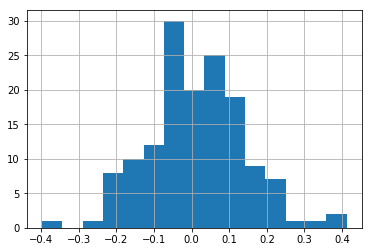

In [67]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

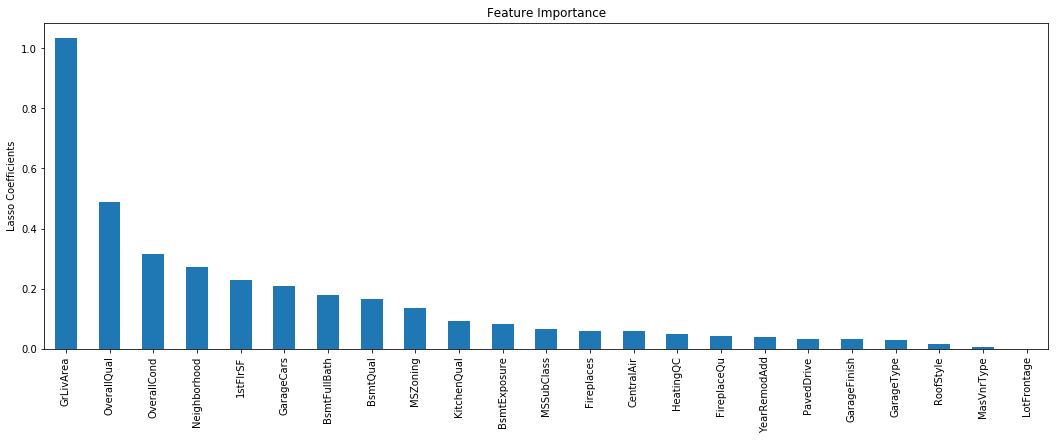

In [62]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

And that is all! Now we have our entire pipeline ready for deployment. In the next video, I will summarise which steps from the pipeline we will deploy or in other words, put in production.